In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

def identify_and_mark_shapes(image_path):
    image = cv2.imread(image_path)
    original_image = image.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)


    edges = cv2.Canny(blurred, 50, 150)


    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    shape_names = []
    shape_centers = []


    for contour in contours:

        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)


        sides = len(approx)


        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            shape_centers.append((cX, cY))

        if sides == 3:
            shape_names.append("Triangle")
        elif sides == 4:
            shape_names.append("Rectangle" if cv2.contourArea(contour) > 2000 else "Square")
        elif sides == 5:
            shape_names.append("Pentagon")
        elif sides == 6:
            shape_names.append("Hexagon")
        elif sides == 7:
            shape_names.append("Heptagon")
        elif sides == 8:
            shape_names.append("Octagon")
        elif sides == 9:
            shape_names.append("Nonagon")

    sorted_shapes = sorted(zip(shape_names, contours), key=lambda x: cv2.contourArea(x[1]), reverse=True)
    for i, (shape_name, contour) in enumerate(sorted_shapes[:2]):
        cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)
        cv2.circle(original_image, shape_centers[i], 5, (255, 0, 0), -1)
        cv2.putText(original_image, f"{shape_name} Center", (shape_centers[i][0] - 20, shape_centers[i][1] - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


    cv2_imshow(original_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

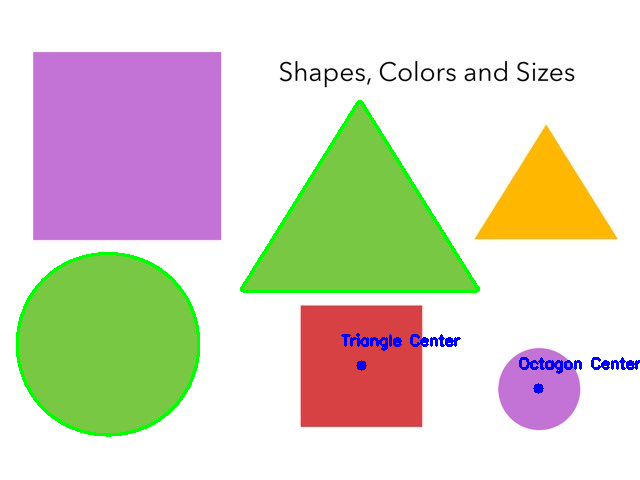

In [10]:
image_path = '/content/drive/MyDrive/phots for utility/unzipped_photo1_photo1phone.jpg'
identify_and_mark_shapes(image_path)


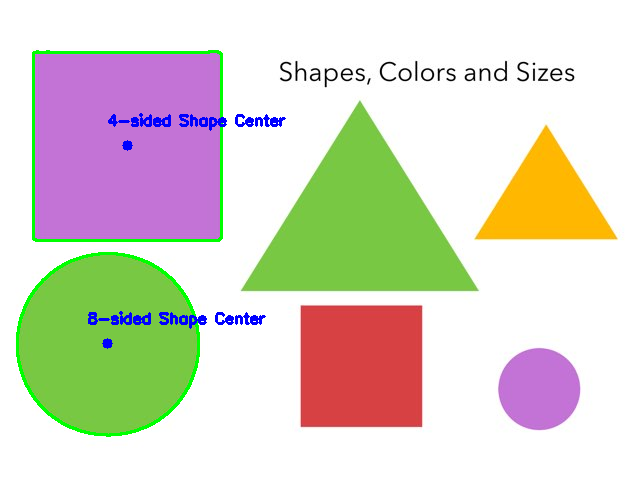

In [12]:

def identify_and_mark_shapes2(image_path):
    # Read the image
    image = cv2.imread(image_path)
    original_image = image.copy()

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges in the image
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store shape information
    shape_info = []

    # Iterate through contours
    for contour in contours:
        # Approximate the polygonal curve of the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Get the number of sides of the polygon
        sides = len(approx)

        # Define the center of the shape
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            shape_info.append({
                'name': sides,
                'contour': contour,
                'center': (cX, cY)
            })

    # Sort shapes by area in descending order
    shape_info = sorted(shape_info, key=lambda x: cv2.contourArea(x['contour']), reverse=True)

    # Draw contours and mark centers for the two largest shapes
    for i in range(min(len(shape_info), 2)):
        shape = shape_info[i]
        cv2.drawContours(original_image, [shape['contour']], -1, (0, 255, 0), 2)
        cv2.circle(original_image, shape['center'], 5, (255, 0, 0), -1)
        cv2.putText(original_image, f"{shape['name']}-sided Shape Center",
                    (shape['center'][0] - 20, shape['center'][1] - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with contours and marked centers
    cv2_imshow( original_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example: Identify and mark shapes in the image
identify_and_mark_shapes2(image_path)
